# ANLY 590 HW2
### April Chung

## 1 Autoencoder

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from keras.models import Model
from keras import backend as K
import numpy as np
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [0]:
input_img = Input(shape=(28,28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [34]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder.fit(x_train, x_train, 
          epochs=5, 
          batch_size = 128,
          shuffle=True, 
          validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 91s 2ms/step - loss: 0.3269 - val_loss: 0.3197
Epoch 2/5
60000/60000 [==============================] - 92s 2ms/step - loss: 0.3165 - val_loss: 0.3139
Epoch 3/5
60000/60000 [==============================] - 91s 2ms/step - loss: 0.3112 - val_loss: 0.3103
Epoch 4/5
60000/60000 [==============================] - 91s 2ms/step - loss: 0.3081 - val_loss: 0.3072
Epoch 5/5
60000/60000 [==============================] - 91s 2ms/step - loss: 0.3055 - val_loss: 0.3054


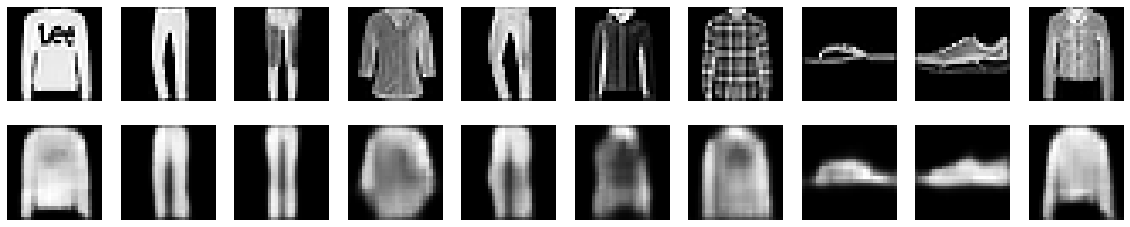

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    i = i + 1
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## 2 Image Classification

### 2.1 Deep CNN

Using similar architecture to the CNN example from here: https://github.com/kjaisingh/fashion-mnist-cnn/blob/master/fashion-cnn.py, I built a deep convolutional neural network with 4 convolutional layers. The model is built with 32 kernels with dimensions 3 by 3 for the first two layers. Then I reduced the layer by using max pooling for dimension 2 by 2. We then apply regularization with dropout, and then ran through the convolutional layers with 64 kernels with dimensions 3 by 3. 
The strides and padding for the the convolutional layer are defautled to 1 and '*valid*', respectively. 

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) #flatten in order to run ANN
model.add(Dense(128, activation = 'relu')) #using 128 parameters
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))#output 10 results to classify 10 classes

model.compile(optimizer='adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [56]:
history_dCNN = model.fit(x_train, y_train, 
          epochs=5, 
          batch_size=32,
          validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 27s 455us/step - loss: 0.2403 - acc: 0.9141 - val_loss: 0.2398 - val_acc: 0.9113
Epoch 2/5
60000/60000 [==============================] - 28s 459us/step - loss: 0.2320 - acc: 0.9173 - val_loss: 0.2427 - val_acc: 0.9122
Epoch 3/5
60000/60000 [==============================] - 27s 456us/step - loss: 0.2255 - acc: 0.9193 - val_loss: 0.2386 - val_acc: 0.9149
Epoch 4/5
60000/60000 [==============================] - 28s 468us/step - loss: 0.2209 - acc: 0.9216 - val_loss: 0.2305 - val_acc: 0.9180
Epoch 5/5
60000/60000 [==============================] - 28s 463us/step - loss: 0.2166 - acc: 0.9225 - val_loss: 0.2607 - val_acc: 0.9093


In [58]:
print(model.evaluate(x_test, y_test))
print(model.evaluate(x_train, y_train))

10000/10000 [==============================] - 1s 122us/step
[0.260681129488349, 0.9093]
60000/60000 [==============================] - 7s 120us/step
[0.18437235265051324, 0.9318]


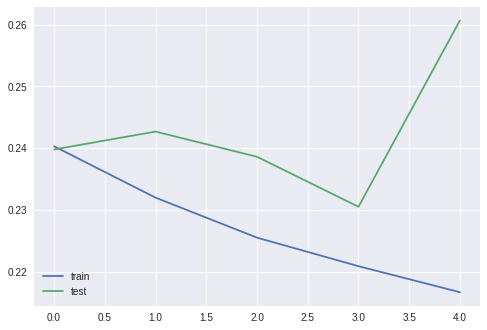

In [59]:
plt.plot(history_dCNN.history['loss'])
plt.plot(history_dCNN.history['val_loss'])
plt.legend(['train', 'test'], loc='lower left')

The result shows there is overfitting in the model as the loss value for test increases after the 3 epoch. Otherwise, the accuracy for both testing and training dataset were pretty high with a little over 90%.

### 2.2 Transfer Learning

In [0]:
from keras.applications import VGG16
import skimage
from skimage.transform import resize
from tqdm import tqdm
from keras.models import Sequential

from keras import backend as K
from keras.layers import Lambda, Input
from keras.models import Model
import cv2

In [0]:
x_train1 = np.asarray([cv2.resize(i, (32,32)) for i in x_train])
x_test1 = np.asarray([cv2.resize(i, (32,32)) for i in x_test])

In [0]:
x_train1 = x_train1.reshape(x_train1.shape[0], 32, 32,1)
x_test1 = x_test1.reshape(x_test1.shape[0], 32, 32, 1)

In [0]:
x_train1 = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in x_train1])
x_test1 = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in x_test1])

In [44]:
conv_base = VGG16(weights = "imagenet", include_top=False, input_shape = (32,32,3))

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
T_model = Sequential()
T_model.add(conv_base)
T_model.add(Flatten())
T_model.add(Dense(256, activation="relu"))
T_model.add(Dense(10, activation="softmax"))

In [46]:
T_model.trainable_weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/kernel:0' shape=(3, 3, 128, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv3/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv3

In [0]:
conv_base.trainable = False

In [48]:
T_model.trainable_weights

[<tf.Variable 'dense_5/kernel:0' shape=(512, 256) dtype=float32_ref>,
 <tf.Variable 'dense_5/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_6/kernel:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'dense_6/bias:0' shape=(10,) dtype=float32_ref>]

In [0]:
T_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [50]:
history = T_model.fit(x_train1,y_train, 
                    epochs=10, 
                    batch_size=150,
                    verbose = 1,
                    validation_data = (x_test1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.5989 - acc: 0.7944 - val_loss: 0.4568 - val_acc: 0.8373
Epoch 2/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.4240 - acc: 0.8458 - val_loss: 0.4341 - val_acc: 0.8430
Epoch 3/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.3898 - acc: 0.8578 - val_loss: 0.4068 - val_acc: 0.8520
Epoch 4/10
60000/60000 [==============================] - 24s 395us/step - loss: 0.3689 - acc: 0.8650 - val_loss: 0.4053 - val_acc: 0.8566
Epoch 5/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.3528 - acc: 0.8693 - val_loss: 0.3891 - val_acc: 0.8596
Epoch 6/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.3383 - acc: 0.8761 - val_loss: 0.3856 - val_acc: 0.8633
Epoch 7/10
60000/60000 [==============================] - 23s 384us/step - loss: 0.3265 - acc: 0.8791 - val_loss: 0.

In [61]:
print(T_model.evaluate(x_test1, y_test))
print(T_model.evaluate(x_train1, y_train))

10000/10000 [==============================] - 6s 562us/step
[0.3688026197910309, 0.8703]
60000/60000 [==============================] - 33s 546us/step
[0.28585817814270653, 0.8950666666666667]


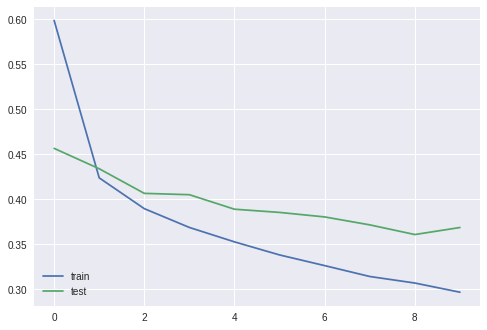

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='lower left')

Using VGG16 as the base model for transfer learning, the accuracy only went up to a little shy of 90% for both the testing and training dataset. After 10 epochs, the loss reached the lowest at 0.368 for testing but it wasn't much lower than 0.285 for training.

## Text Classification

In [0]:
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, Dropout, Input, GlobalMaxPooling1D
from keras.optimizers import RMSprop

In [0]:
from urllib.request import urlopen

benign_urls =urlopen('https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt').read().decode("utf-8") 
malicious_urls =urlopen('https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt').read().decode("utf-8") 

In [0]:
benign_urls = benign_urls.split("\n")
malicious_urls = malicious_urls.split("\n")

Benign urls are 1 and malicious urls are 0

In [0]:
b_urls = pd.DataFrame(benign_urls)
b_urls['benign'] = 1

In [0]:
m_urls = pd.DataFrame(malicious_urls)
m_urls['benign'] = 0

In [0]:
urls = pd.concat([b_urls, m_urls])
urls.columns = ['urls', 'benign']

In [0]:
#list(urls['urls'])
tokenizer = Tokenizer(num_words = 100000)
# Building the word index
tokenizer.fit_on_texts(urls['urls'])
sequences = tokenizer.texts_to_sequences(urls['urls'])
urls['urls_tokenized'] = sequences

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(urls['urls_tokenized'], urls['benign'], test_size=0.33, random_state=42)

In [0]:
from keras.preprocessing import sequence
maxlen = max(urls['urls'].str.len())
X_train = sequence.pad_sequences(X_train, maxlen = maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [0]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [12]:
class_weights

array([26.05484988,  0.50978288])

### 3.1 RNN

In [0]:
max_features = 100000
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(Dropout(.25))
model.add(SimpleRNN(128))
model.add(Dense(1, activation ='sigmoid'))

In [0]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['acc'])

In [15]:
history_rnn = model.fit(X_train, y_train, 
                    epochs = 5, 
                    batch_size = 64, 
                    validation_data = (X_test,y_test),
                    verbose=1,
                   class_weight=class_weights)

Train on 45127 samples, validate on 22227 samples
Epoch 1/5
45127/45127 [==============================] - 53s 1ms/step - loss: 0.0425 - acc: 0.9838 - val_loss: 0.0209 - val_acc: 0.9896
Epoch 2/5
45127/45127 [==============================] - 51s 1ms/step - loss: 0.0213 - acc: 0.9900 - val_loss: 0.0193 - val_acc: 0.9911
Epoch 3/5
45127/45127 [==============================] - 51s 1ms/step - loss: 0.0157 - acc: 0.9932 - val_loss: 0.0192 - val_acc: 0.9920
Epoch 4/5
45127/45127 [==============================] - 51s 1ms/step - loss: 0.0116 - acc: 0.9961 - val_loss: 0.0198 - val_acc: 0.9909
Epoch 5/5
45127/45127 [==============================] - 50s 1ms/step - loss: 0.0067 - acc: 0.9981 - val_loss: 0.0218 - val_acc: 0.9923


In [16]:
model.evaluate(X_test, y_test)

22227/22227 [==============================] - 9s 425us/step


[0.021793715414696786, 0.9923066540693751]

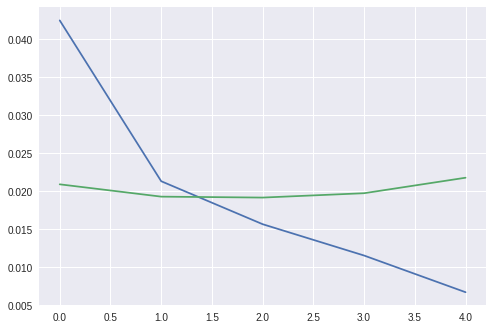

In [17]:
import matplotlib.pyplot as plt

plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])

In [0]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test).ravel()
y_pred2 = (y_pred > 0.5)

In [19]:
pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'])

Predicted,False,True
Actual,,
0,401,30
1,141,21655


### 3.2 CNN

In [0]:
from keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D

model_conv = Sequential()
model_conv.add(Embedding(max_features, output_dim = 30, input_length=86))
model_conv.add(Dropout(0.2))
model_conv.add(Conv1D(128, 5, activation='relu'))
model_conv.add(GlobalMaxPooling1D())
model_conv.add(Dropout(0.2))
model_conv.add(Dense(1, activation='sigmoid'))

In [0]:
model_conv.compile(loss='binary_crossentropy', optimizer='adam',    metrics=['accuracy'])

In [78]:
history = model_conv.fit(X_train, y_train,
          epochs=5,
          batch_size=60,
          verbose = 1,
          validation_data = (X_test, y_test),
          class_weight = class_weights)

Train on 45127 samples, validate on 22227 samples
Epoch 1/5
45127/45127 [==============================] - 12s 259us/step - loss: 0.0738 - acc: 0.9802 - val_loss: 0.0225 - val_acc: 0.9806
Epoch 2/5
45127/45127 [==============================] - 11s 238us/step - loss: 0.0166 - acc: 0.9928 - val_loss: 0.0166 - val_acc: 0.9932
Epoch 3/5
45127/45127 [==============================] - 11s 249us/step - loss: 0.0049 - acc: 0.9991 - val_loss: 0.0171 - val_acc: 0.9920
Epoch 4/5
45127/45127 [==============================] - 11s 250us/step - loss: 0.0013 - acc: 0.9997 - val_loss: 0.0177 - val_acc: 0.9918
Epoch 5/5
45127/45127 [==============================] - 11s 251us/step - loss: 7.4319e-04 - acc: 0.9998 - val_loss: 0.0189 - val_acc: 0.9912


In [79]:
model_conv.evaluate(X_test, y_test)

22227/22227 [==============================] - 2s 77us/step


[0.018868079593255947, 0.9912268862194629]

In [0]:
from sklearn.metrics import confusion_matrix
y_pconv = model_conv.predict(X_test).ravel()
y_pconv2 = (y_pconv > 0.5)

In [93]:
pd.crosstab(y_test, y_pconv2, rownames=['Actual'], colnames=['Predicted'])

Predicted,False,True
Actual,,
0,315,116
1,79,21717


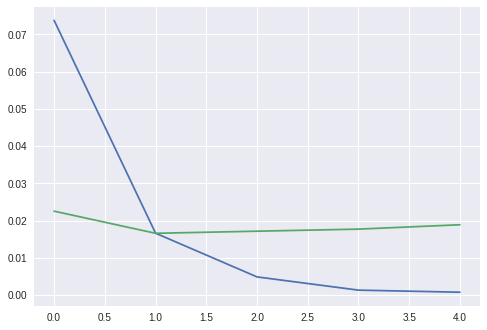

In [82]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

### 3.3

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
f_pcnn, t_pcnn, thresholds = roc_curve(y_test, y_pconv2)
auc_pred_cnn = auc(f_pcnn, t_pcnn)
f_predicted, t_predicted, thresholds = roc_curve(y_test, y_pred)
auc_pred = auc(f_predicted, t_predicted)

In [95]:
print(auc_pred_cnn)
print(auc_pred)

0.8636169752086315
0.9967407119124861


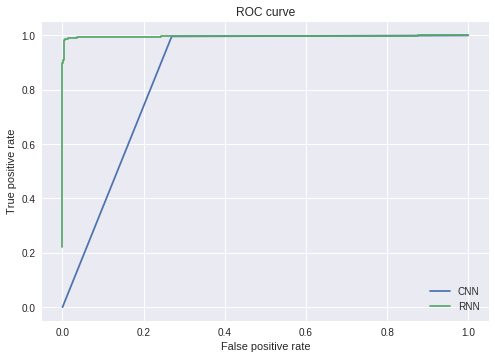

In [85]:
plt.figure(1)
plt.plot(f_pcnn, t_pcnn, label='CNN'.format(auc_pred_cnn))
plt.plot(f_predicted, t_predicted, label='RNN'.format(auc_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

From the ROC curves, we can see the RNN model performed better than the CNN model. The RNN had an accuracy rate of 99% which gave almost a perfect ROC curve. However, the CNN model did worse with an area under the curve of ~86%. The RNN result also gave a better false negative rate of 7% which means that only 7% malicious urls were mistakenly identified as benign. The CNN had a higher false negative rate of 27%, making this model not as good even though the accuracy rate was high of 99%.